In [2]:
from datetime import datetime, timedelta
from opendrift.models.oceandrift import OceanDrift
from opendrift.readers import reader_ROMS_native
import xarray as xr
import numpy as np

#from opendrift.readers.reader_ROMS_native import Reader
        # ds = xr.open_dataset(filename, decode_times=False)
        # r = Reader(ds)

o2=[]
# Basic ocean drift module: current + 2% of wind
o2 = OceanDrift(loglevel=20)

#o2.set_config('general:coastline_action', 'none')
#o2.set_config('general:use_auto_landmask', False)


netCDFs = '/import/VERTMIX/DABOB_JGP/HC_100m_30layers/Experiments/HC_100m_2024.04.05_30days/netcdfOutput/hc_his_*.nc'
grid = '/import/VERTMIX/DABOB_JGP/HC_100m_30layers/Experiments/HC_100m_2024.04.05_30days/HC_100mME_wetDry.nc'
#grid = './test_grid_lonshift.nc'

hc_ds = xr.open_mfdataset(netCDFs)
hc_grid_ds = xr.open_dataset(grid)

hc_native = reader_ROMS_native.Reader(f'{netCDFs}',gridfile=grid)

o2.add_reader(hc_native,)



07:58:23 INFO    opendrift.models.basemodel:528: OpenDriftSimulation initialised (version 1.11.1 / v1.11.1-26-gc27e2f6-dirty)
07:58:43 INFO    opendrift.readers.reader_ROMS_native:148: Opening dataset: /import/VERTMIX/DABOB_JGP/HC_100m_30layers/Experiments/HC_100m_2024.04.05_30days/netcdfOutput/hc_his_*.nc
07:58:43 INFO    opendrift.readers.reader_ROMS_native:150: Opening files with MFDataset
07:58:43 INFO    opendrift.readers.reader_ROMS_native:246: Read GLS parameters from file.
07:58:43 WARNING opendrift.readers.basereader.structured:50: No proj string or projection could be derived, using 'fakeproj'. This assumes that the variables are structured and gridded approximately equidistantly on the surface (i.e. in meters). This must be guaranteed by the user. You can get rid of this warning by supplying a valid projection to the reader.
07:58:43 INFO    opendrift.readers.basereader.structured:90: Making interpolator for lon,lat to x,y conversion...


In [3]:
hc_ds['

<xarray.Dataset> Size: 220GB
Dimensions:         (ocean_time: 721, tracer: 2, boundary: 4, s_rho: 30,
                     s_w: 31, eta_rho: 662, xi_rho: 471, eta_u: 662, xi_u: 470,
                     eta_v: 661, xi_v: 471)
Coordinates:
  * s_rho           (s_rho) float64 240B -0.9833 -0.95 ... -0.05 -0.01667
  * s_w             (s_w) float64 248B -1.0 -0.9667 -0.9333 ... -0.03333 0.0
  * ocean_time      (ocean_time) datetime64[ns] 6kB 2024-04-05 ... 2024-05-05
Dimensions without coordinates: tracer, boundary, eta_rho, xi_rho, eta_u, xi_u,
                                eta_v, xi_v
Data variables: (12/86)
    ntimes          (ocean_time) int32 3kB 518400 518400 ... 518400 518400
    ndtfast         (ocean_time) int32 3kB 20 20 20 20 20 20 ... 20 20 20 20 20
    dt              (ocean_time) float64 6kB 5.0 5.0 5.0 5.0 ... 5.0 5.0 5.0 5.0
    dtfast          (ocean_time) float64 6kB 0.25 0.25 0.25 ... 0.25 0.25 0.25
    dstart          (ocean_time) datetime64[ns] 6kB 2024-04-05 ... 2024-04-05
    nHIS            (ocean_time) int32 3kB 720 720 720 720 ... 720 720 720 720
    ...              ...
    w               (ocean_time, s_w, eta_rho, xi_rho) float32 28GB dask.array<chunksize=(25, 31, 662, 471), meta=np.ndarray>
    temp            (ocean_time, s_rho, eta_rho, xi_rho) float32 27GB dask.array<chunksize=(25, 30, 662, 471), meta=np.ndarray>
    salt            (ocean_time, s_rho, eta_rho, xi_rho) float32 27GB dask.array<chunksize=(25, 30, 662, 471), meta=np.ndarray>
    AKv             (ocean_time, s_w, eta_rho, xi_rho) float32 28GB dask.array<chunksize=(25, 31, 662, 471), meta=np.ndarray>
    tke             (ocean_time, s_w, eta_rho, xi_rho) float32 28GB dask.array<chunksize=(25, 31, 662, 471), meta=np.ndarray>
    gls             (ocean_time, s_w, eta_rho, xi_rho) float32 28GB dask.array<chunksize=(25, 31, 662, 471), meta=np.ndarray>
Attributes: (12/39)
    file:              ./netcdfOutput/hc_his_00001.nc
    format:            netCDF-3 64bit offset file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS history file
    title:             HC - 100m
    var_info:          ./Apps/varinfo_LOCAL.dat
    ...                ...
    compiler_command:  /opt/scyld/openmpi/1.10.7/intel/bin/mpif90
    compiler_flags:    -fp-model precise -ip -O3 -traceback -check uninit
    tiling:            012x014
    history:           ROMS/TOMS, Version 3.9, Saturday - July 6, 2024 - 12:0...
    ana_file:          ROMS/Functionals/ana_btflux.h
    CPP_options:       HC, ANA_BSFLUX, ANA_BTFLUX, ASSUMED_SHAPE, !BOUNDARY_A...

# Seed the drift model with 100 particles

Particles will be distributed in a 100m radius between 95 and 100m.

07:59:33 INFO    opendrift.models.basemodel.environment:220: Adding a dynamical landmask with max. priority based on assumed maximum speed of 1.0 m/s. Adding a customised landmask may be faster...
07:59:44 INFO    opendrift.models.basemodel.environment:247: Fallback values will be used for the following variables which have no readers: 
07:59:44 INFO    opendrift.models.basemodel.environment:250: 	x_wind: 0.000000
07:59:44 INFO    opendrift.models.basemodel.environment:250: 	y_wind: 0.000000
07:59:44 INFO    opendrift.models.basemodel.environment:250: 	ocean_vertical_diffusivity: 0.000000
07:59:44 INFO    opendrift.models.basemodel.environment:250: 	sea_surface_wave_significant_height: 0.000000
07:59:44 INFO    opendrift.models.basemodel.environment:250: 	sea_surface_wave_stokes_drift_x_velocity: 0.000000
07:59:44 INFO    opendrift.models.basemodel.environment:250: 	sea_surface_wave_stokes_drift_y_velocity: 0.000000
07:59:44 INFO    opendrift.models.basemodel.environment:250: 	sea_surf

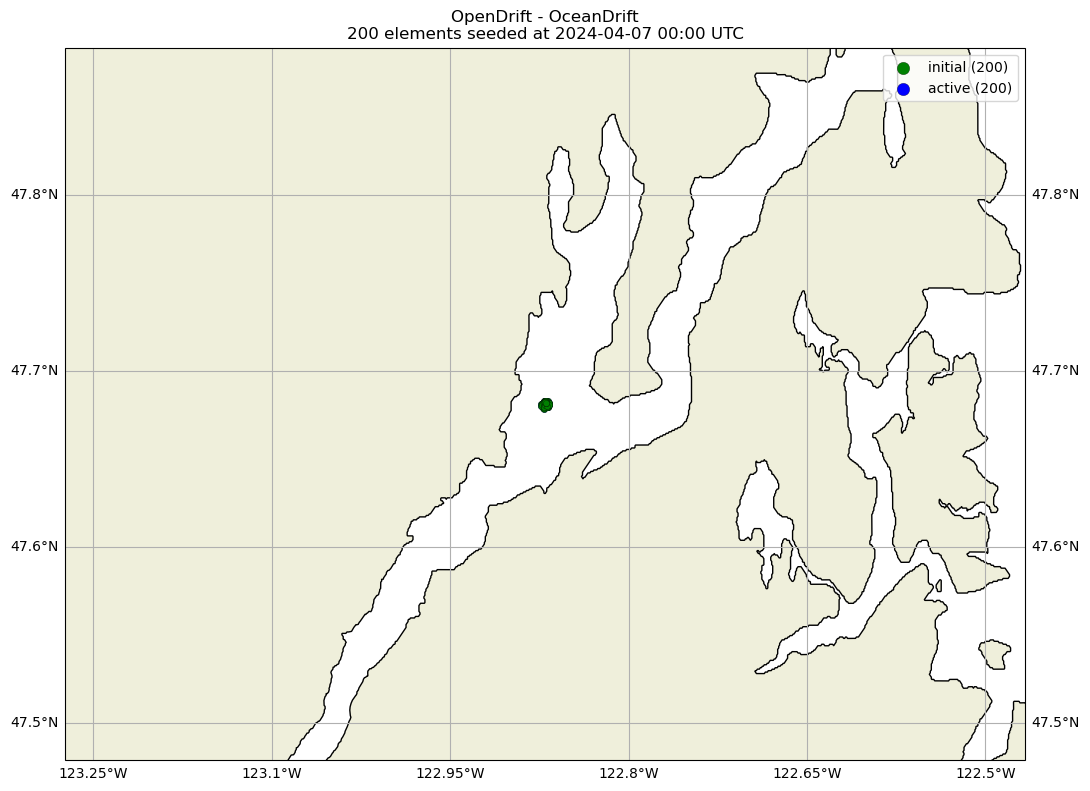

(<GeoAxes: title={'center': 'OpenDrift - OceanDrift\n200 elements seeded at 2024-04-07 00:00 UTC'}>,
 <Figure size 1100x819.255 with 1 Axes>)

In [4]:
hc_sill = (47.75,237.26)
#hc_sill = (47.75,-122.74)
dabob_mouth = (47.69555,237.141)

dabob_sill_gap = (47.681, -122.87 + 360)
#dabob_sill_gap = (47.681, -122.87)


# o2.seed_elements(lon=hc_sill[1], 
#                 lat=hc_sill[0], 
#                 time=datetime(2024,3,2,0,0,),
#                 number=50, 
#                 radius=100)
o2.seed_elements(lon=dabob_sill_gap[1], 
                lat=dabob_sill_gap[0], 
                time=datetime(2024,4,7,0,0,),
                number=100, 
                radius=100,
                z=np.linspace(-95,-100,100)
                )
o2.seed_elements(lon=dabob_sill_gap[1], 
                lat=dabob_sill_gap[0], 
                time=datetime(2024,4,7,0,0,),
                number=100, 
                radius=100,
                z=np.linspace(-5,-10,100)
                )
o2.plot()


# Run opendrift and save output

In [5]:
o2.run(time_step=timedelta(minutes=10),
      duration=timedelta(days=10),
      outfile='test_output_30day.nc');
#o2.plot()

08:00:50 INFO    opendrift.models.basemodel:891: Using existing reader for land_binary_mask
08:00:50 INFO    opendrift.models.basemodel:903: All points are in ocean
08:00:50 INFO    opendrift.readers.reader_ROMS_native:318: Using mask_rho for mask_rho
08:00:50 INFO    opendrift.models.basemodel:1992: 2024-04-07 00:00:00 - step 1 of 1440 - 200 active elements (0 deactivated)
08:00:51 INFO    opendrift.readers.reader_ROMS_native:339: Using mask_u for mask_u
08:00:53 INFO    opendrift.readers.reader_ROMS_native:535: Time: 0:00:01.199454
08:00:53 INFO    opendrift.readers.reader_ROMS_native:360: Using mask_v for mask_v
08:00:54 INFO    opendrift.models.basemodel:1992: 2024-04-07 00:10:00 - step 2 of 1440 - 200 active elements (0 deactivated)
08:00:54 INFO    opendrift.models.basemodel:1992: 2024-04-07 00:20:00 - step 3 of 1440 - 200 active elements (0 deactivated)
08:00:54 INFO    opendrift.models.basemodel:1992: 2024-04-07 00:30:00 - step 4 of 1440 - 200 active elements (0 deactivated)
08

In [15]:
#o2.plot(linecolor='z',alpha=0.3)
o2.animation(filename="test.mp4")

08:49:58 INFO    opendrift.models.basemodel:4524: Saving animation to test.mp4...
09:03:18 INFO    opendrift.models.basemodel:2996: Time to make animation: 0:13:21.128022


# Read drifter locations back in to xarray, filter out bad depths

In [7]:
test_out = xr.open_dataset('test_output_30day.nc')
!ls '../../pisces-dabob-vis/data/'

external  interim  processed  raw


In [8]:
test_out2 = test_out.where(test_out.z <0)

# Plot deep (first 100) and shallow (last 100) drifter particles

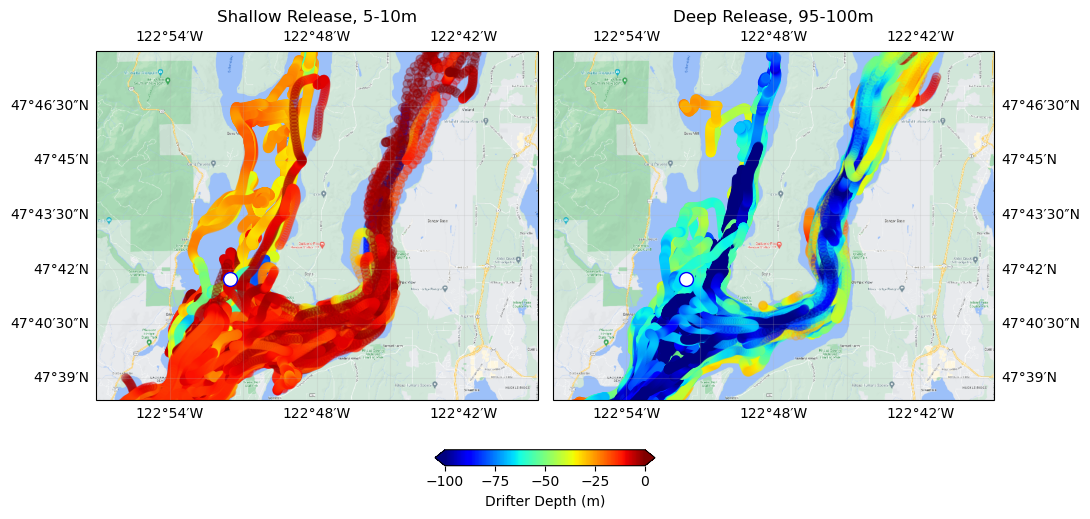

In [21]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import cmocean
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter
import matplotlib.ticker as mticker

# Add google background to map
stamen_terrain = cimgt.GoogleTiles()

# zoom in for Aug field work
(ll_lat, ll_lon) = ( 47.64, -122.95)
(ur_lat, ur_lon) = ( 47.8, -122.65)

# # zoom out, Hood Canal
# (ll_lat, ll_lon) = ( 47.342946, -123.177)
# (ur_lat, ur_lon) = ( 47.896, -122.543)

# Create colorbar limits
norm = mpl.colors.Normalize(vmin=-100,vmax=0)

# Create figure
fig = plt.figure(figsize=(11,8))

# Create Subplots, surface floats on left. Use Google map projection
ax1 = plt.subplot(1,2,1,projection=ccrs.Mercator())
ax2 = plt.subplot(1,2,2,projection=ccrs.Mercator())

# Plot deep drifters
ax2.add_image(stamen_terrain, 13)
ax2.scatter(test_out2['lon'][0:99,:],test_out2['lat'][0:99,:],
            c=test_out2['z'][0:99,:], 
            cmap='jet',
            norm=norm,
            alpha=0.3,
            transform=ccrs.PlateCarree())
ax2.plot(dabob_mouth[1],dabob_mouth[0],
         'o',
         markerfacecolor='white',
         markeredgecolor='blue',
         markersize=10,
         transform=ccrs.PlateCarree())
ax2.set_xlim(-122.95,-122.6)

# Limit the extent of the map to a small longitude/latitude range.
ax2.set_extent([ll_lon, ur_lon, ll_lat, ur_lat], crs=ccrs.Geodetic())
gl2 = ax2.gridlines(draw_labels=True, dms=True, alpha=0.2,x_inline=False, y_inline=False)

# remove labels on left side of plot so it doesn't conflict with the shallow plot
gl2.left_labels = []
ax2.set_title('Deep Release, 95-100m')


# Plot shallow drifters
ax1.add_image(stamen_terrain, 13)
ax1.scatter(test_out2['lon'][100:199,:],test_out2['lat'][100:199,:],
            c=test_out2['z'][100:199,:],
            cmap='jet',
            norm=norm,
            alpha=0.3,
            transform=ccrs.PlateCarree())
ax1.plot(dabob_mouth[1],dabob_mouth[0],
         'o',
         markerfacecolor='white',
         markeredgecolor='blue',
         markersize=10,
         transform=ccrs.PlateCarree())

# Limit the extent of the map to a small longitude/latitude range.
ax1.set_extent([ll_lon, ur_lon, ll_lat, ur_lat], crs=ccrs.Geodetic())
gl1 = ax1.gridlines(draw_labels=True, dms=True, alpha=0.2,x_inline=False, y_inline=False)
gl1.right_labels = []
ax1.set_title('Shallow Release, 5-10m')

# Add Colorbar
cbaxes = fig.add_axes([0.4, 0.2, 0.2, 0.02]) 
cb=plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='jet'),
                cax=cbaxes, 
                orientation='horizontal',
                extend='both', 
                label='Drifter Depth (m)'
               )
cbaxes.set_zorder(5)
fig.savefig('/home/cpsarason/data/opendrift_movie/shallow-deep-drifters-10day.png')

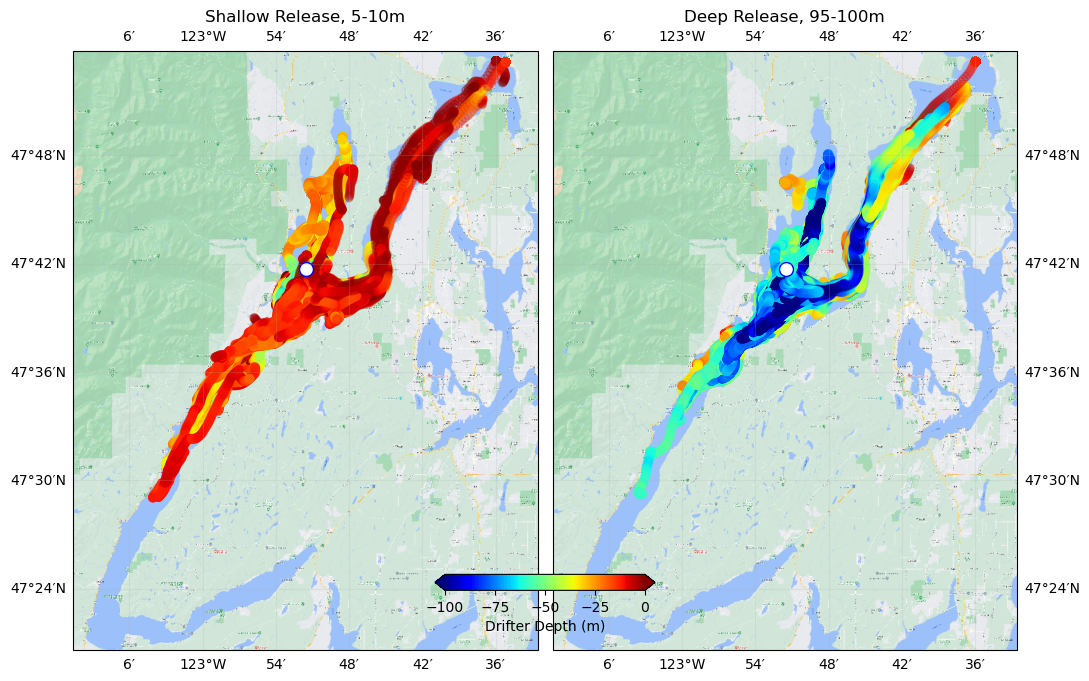

In [22]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import cmocean
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter
import matplotlib.ticker as mticker

# Add google background to map
stamen_terrain = cimgt.GoogleTiles()

# zoom in for Aug field work
(ll_lat, ll_lon) = ( 47.64, -122.95)
(ur_lat, ur_lon) = ( 47.8, -122.65)

# zoom out, Hood Canal
(ll_lat, ll_lon) = ( 47.342946, -123.177)
(ur_lat, ur_lon) = ( 47.896, -122.543)

# Create colorbar limits
norm = mpl.colors.Normalize(vmin=-100,vmax=0)

# Create figure
fig = plt.figure(figsize=(11,8))

# Create Subplots, surface floats on left. Use Google map projection
ax1 = plt.subplot(1,2,1,projection=ccrs.Mercator())
ax2 = plt.subplot(1,2,2,projection=ccrs.Mercator())

# Plot deep drifters
ax2.add_image(stamen_terrain, 13)
ax2.scatter(test_out2['lon'][0:99,:],test_out2['lat'][0:99,:],
            c=test_out2['z'][0:99,:], 
            cmap='jet',
            norm=norm,
            alpha=0.3,
            transform=ccrs.PlateCarree())
ax2.plot(dabob_mouth[1],dabob_mouth[0],
         'o',
         markerfacecolor='white',
         markeredgecolor='blue',
         markersize=10,
         transform=ccrs.PlateCarree())
ax2.set_xlim(-122.95,-122.6)

# Limit the extent of the map to a small longitude/latitude range.
ax2.set_extent([ll_lon, ur_lon, ll_lat, ur_lat], crs=ccrs.Geodetic())
gl2 = ax2.gridlines(draw_labels=True, dms=True, alpha=0.2,x_inline=False, y_inline=False)

# remove labels on left side of plot so it doesn't conflict with the shallow plot
gl2.left_labels = []
ax2.set_title('Deep Release, 95-100m')


# Plot shallow drifters
ax1.add_image(stamen_terrain, 13)
ax1.scatter(test_out2['lon'][100:199,:],test_out2['lat'][100:199,:],
            c=test_out2['z'][100:199,:],
            cmap='jet',
            norm=norm,
            alpha=0.3,
            transform=ccrs.PlateCarree())
ax1.plot(dabob_mouth[1],dabob_mouth[0],
         'o',
         markerfacecolor='white',
         markeredgecolor='blue',
         markersize=10,
         transform=ccrs.PlateCarree())

# Limit the extent of the map to a small longitude/latitude range.
ax1.set_extent([ll_lon, ur_lon, ll_lat, ur_lat], crs=ccrs.Geodetic())
gl1 = ax1.gridlines(draw_labels=True, dms=True, alpha=0.2,x_inline=False, y_inline=False)
gl1.right_labels = []
ax1.set_title('Shallow Release, 5-10m')

# Add Colorbar
cbaxes = fig.add_axes([0.4, 0.2, 0.2, 0.02]) 
cb=plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='jet'),
                cax=cbaxes, 
                orientation='horizontal',
                extend='both', 
                label='Drifter Depth (m)'
               )
cbaxes.set_zorder(5)
fig.savefig('/home/cpsarason/data/opendrift_movie/shallow-deep-drifters-10day-hoodcanal.png')

In [19]:
test_out2


<xarray.Dataset> Size: 43MB
Dimensions:                                                                              (
                                                                                          trajectory: 200,
                                                                                          time: 1441)
Coordinates:
  * trajectory                                                                           (trajectory) int32 800B ...
  * time                                                                                 (time) datetime64[ns] 12kB ...
Data variables: (12/34)
    status                                                                               (trajectory, time) float64 2MB ...
    moving                                                                               (trajectory, time) float64 2MB ...
    age_seconds                                                                          (trajectory, time) float32 1MB ...
    origin_marker                                                                        (trajectory, time) float64 2MB ...
    lon                                                                                  (trajectory, time) float32 1MB ...
    lat                                                                                  (trajectory, time) float32 1MB ...
    ...                                                                                   ...
    surface_downward_y_stress                                                            (trajectory, time) float32 1MB ...
    turbulent_kinetic_energy                                                             (trajectory, time) float32 1MB ...
    turbulent_generic_length_scale                                                       (trajectory, time) float32 1MB ...
    ocean_mixed_layer_thickness                                                          (trajectory, time) float32 1MB ...
    sea_floor_depth_below_sea_level                                                      (trajectory, time) float32 1MB ...
    land_binary_mask                                                                     (trajectory, time) float32 1MB ...
Attributes: (12/137)
    Conventions:                                                             ...
    standard_name_vocabulary:                                                ...
    featureType:                                                             ...
    history:                                                                 ...
    source:                                                                  ...
    model_url:                                                               ...
    ...                                                                                                               ...
    geospatial_lat_resolution:                                               ...
    geospatial_lon_min:                                                      ...
    geospatial_lon_max:                                                      ...
    geospatial_lon_units:                                                    ...
    geospatial_lon_resolution:                                               ...
    runtime:                                                                 ...